In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import modules
import pandas as pd
import numpy as np
import wx

# Import CaBiD modules
from utils import datadir, CaBiD_db
from curation import datacheck
from gui import CaBiD_GUI

%gui wx

In [15]:
import wx
import matplotlib
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.figure import Figure

class MainFrame(wx.Frame): 
    def __init__(self): 
        wx.Frame.__init__(self, None, wx.NewId(), "Main") 
        self.sizer = wx.BoxSizer(wx.HORIZONTAL)
        self.figure = Figure(figsize=(1,2))
        self.axe = self.figure.add_subplot(111)
        self.figurecanvas = FigureCanvas(self, -1, self.figure)
        self.valueCtrl = wx.TextCtrl(self, -1, "")
        self.buttonPlot = wx.Button(self, wx.NewId(), "Plot")
        self.sizer.Add(self.figurecanvas, proportion=1, border=5,
                       flag=wx.ALL | wx.EXPAND)
        self.sizer.Add(self.buttonPlot, proportion=0, border=2, flag=wx.ALL)
        self.sizer.Add(self.valueCtrl, proportion=0, border=2, flag=wx.ALL)
        self.SetSizer(self.sizer)
        self.buttonPlot.Bind(wx.EVT_BUTTON, self.on_button_plot)

    def on_button_plot(self, evt):
        self.figure.set_canvas(self.figurecanvas)
        self.axe.clear()
        self.axe.plot(range(int(self.valueCtrl.GetValue())), color='green')
        self.figurecanvas.draw()

class MyApp(wx.App):
    def OnInit(self):
        frame = MainFrame()
        frame.Show(True)
        self.SetTopWindow(frame)
        return True

wx.GetApp();
MainFrame().Show();

/tmp/ipykernel_5878/1606478826.py:8: DeprecationWarning: NewId() is deprecated
  wx.Frame.__init__(self, None, wx.NewId(), "Main")
/tmp/ipykernel_5878/1606478826.py:14: DeprecationWarning: NewId() is deprecated
  self.buttonPlot = wx.Button(self, wx.NewId(), "Plot")


In [14]:
wx.GetApp();
CaBiD_GUI().Show();

Gdk-Message: 16:39:43.813: Unable to load sb_h_double_arrow from the cursor theme


Analyzed!
Closing connection to /home/kabil/.cabid/CaBiD.db


-----------------

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import pickle
dge = pickle.load(open('dge.pkl', 'rb'))

dge.head()

,gene,fc,pval,adj pval,-log10(adj pval),de
0,AA001021.0,-0.013857,0.810797,0.872575,0.059197,Non Significant
1,AA001021.1,0.514681,0.047314,0.102181,0.990630,Non Significant
2,AA001052.0,0.400088,0.000058,0.000358,3.446506,Non Significant
3,AA001150.0,-0.538757,0.021486,0.054257,1.265542,Non Significant
4,AA001203.0,-0.054471,0.591427,0.702149,0.153571,Non Significant


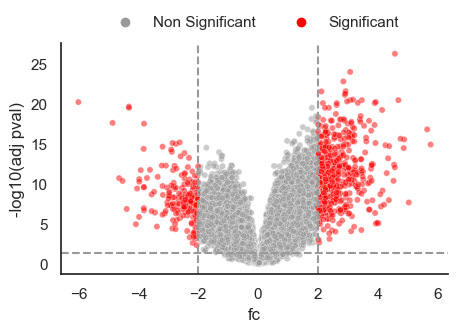

In [54]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.clear()
sns.scatterplot(
    data=dge, x='fc', y='-log10(adj pval)', hue='de',
    ax=ax, s=20, alpha=0.5, palette=['#999999', '#ff0000']
)
ax.axhline(-np.log10(0.05), color='#999999', linestyle='--')
ax.axvline(2, color='#999999', linestyle='--')
ax.axvline(-2, color='#999999', linestyle='--')
sns.move_legend(
    ax, "lower center", ncol=3, title=None,
    frameon=False, bbox_to_anchor=(.5, 1),
)
sns.despine()